In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
CryptoDF = pd.read_csv("crypto_data.csv")
CryptoDF = pd.DataFrame(CryptoDF)
CryptoDF = CryptoDF.drop(CryptoDF.index[CryptoDF['IsTrading'] == False]).dropna()
CryptoDF = CryptoDF.drop(CryptoDF.index[CryptoDF['TotalCoinsMined'] <= 0])
CryptoDF = CryptoDF.drop('IsTrading', 1).drop('CoinName', 1).drop('Unnamed: 0', 1)
CryptoDF.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [7]:
CryptoDF['TotalCoinSupply'] = CryptoDF['TotalCoinSupply'].astype(float)
CryptoDF['TotalCoinSupply']

0       4.200000e+01
2       5.320000e+08
5       3.141593e+11
7       2.100000e+07
8       0.000000e+00
            ...     
1238    2.000000e+09
1242    2.500000e+08
1245    1.400223e+09
1246    2.100000e+07
1247    1.000000e+06
Name: TotalCoinSupply, Length: 532, dtype: float64

In [10]:
CryptoDF = pd.get_dummies(CryptoDF, drop_first = True)
CryptoDF

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(CryptoDF)
scaled_df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [15]:
pca = PCA(n_components = 0.9)
df_pca = pca.fit_transform(scaled_df)

In [16]:
df_cc = pd.DataFrame(data = df_pca)
df_cc.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,2.601561e-14,6.522550e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,4.771880e-16,-3.658501e-15,-4.195183e-16,1.310193e-15,-1.959094e-15,1.556045e-15,2.226507e-15,5.911445e-16,-3.078212e-15,3.872931e-16
1,-0.319249,1.043547,-0.537804,0.001337,2.629941e-14,6.540291e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,8.020778e-16,-3.375755e-15,1.088861e-16,1.133463e-15,-1.820442e-15,1.301803e-15,1.699764e-15,4.381857e-16,-3.092618e-15,5.001934e-16
2,2.304716,1.669996,-0.624077,0.004420,3.966537e-14,9.596858e-14,-0.062312,-1.554093,-0.945690,0.375087,...,6.821266e-15,2.501708e-14,-1.564621e-14,-6.775102e-15,-6.239732e-14,1.767195e-14,3.937774e-15,9.510967e-15,-8.014290e-15,-1.749375e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-9.302608e-15,-2.509897e-14,0.000326,0.283548,0.252906,-0.079820,...,-7.503107e-15,1.140211e-14,5.528911e-16,-1.190721e-14,-5.476968e-15,5.672859e-15,-6.422268e-16,1.869553e-15,-9.226112e-16,-6.705759e-15
4,-0.151951,-2.044976,0.364208,-0.001636,-2.157542e-14,-4.687778e-14,0.032350,0.524429,0.191031,0.074021,...,-2.028875e-13,1.068663e-13,3.192552e-14,-7.471559e-14,-8.782977e-14,-1.492744e-15,3.060897e-14,4.285098e-14,9.924138e-14,1.037389e-13


In [17]:
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [18]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_cc)

df_tsne = pd.DataFrame(tsne_features).reset_index(drop = True)
tsne_features.shape

(532, 2)

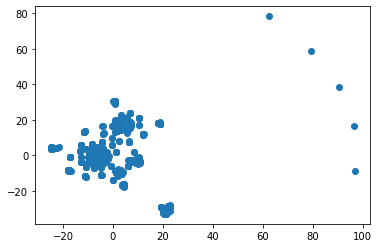

In [19]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [21]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(CryptoDF)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\gusth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23


Text(0.5, 1.0, 'Elbow curve')

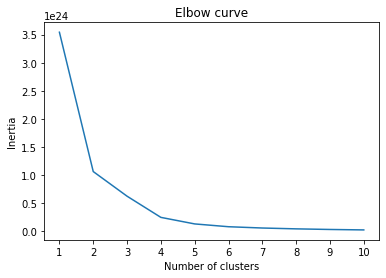

In [23]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')